slope = 0.015979397311965602+/-0.00022065881058272273, y-intercept = -11.624040905828423+/-8.928403373005519e-05


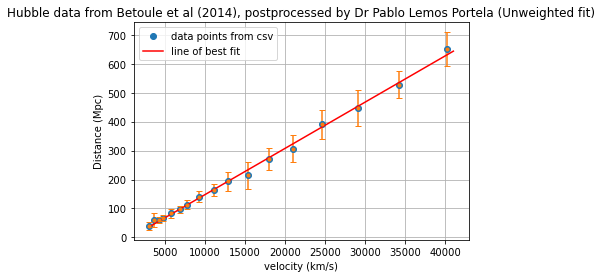

In [84]:
############################################################################################################################
###############-----Hubble data from Betoule et al (2014) to calculate a value for Hubble's constant-----###################
############################################################################################################################
#In this notebook, I will be using the data from the csv-file Session5data.csv to make a line of best fit based on method of
#least square fitting. Then, I will use the slope of the line of best fit to find the Diffusion Co-efficient of No-ions in 
#the glass. We'll also be calculating the uncertainty values every step of the way.
############################################################################################################################

import numpy as np
import matplotlib.pyplot as plt

#Load the csv-file onto notebook, unpack it and assign it to x1 and y1.
vel, dist, dist_err = np.loadtxt('hubble_data.csv', delimiter=',', unpack=True) 

#Plot the points for the data-set .
plt.figure()
plt.plot(vel,dist, 'o', label='data points from csv') #Set label name so it can be used for legend
plt.title("Hubble data from Betoule et al (2014), postprocessed by Dr Pablo Lemos Portela (Unweighted fit)")#I chose this title as it adequately describes what the graph is.
plt.xlabel(r"velocity (km/s)") #Name the x-axis to show what type of data it represents and its units
plt.ylabel(r"Distance (Mpc)") #Name the y-axis 

#Make the necessary calculations to calculate the slope and y-intercept of line of best fit(method of least sqaures fitting
xmean = np.mean(vel)
ymean = np.mean(dist)
m = (np.sum(vel*dist-xmean*dist))/(np.sum((vel-xmean)**2))  
c = ymean - m*xmean

#Make calculations for uncertainty values of gradient and y-intercept
S = np.sum((dist-m*vel-c)**2)
D = np.sum((vel-xmean)**2)
n = len(vel)

delta_m = np.sqrt(S/((n-2)*D))
delta_c = np.sqrt(((1/n)+(((xmean)**2)/D))*(S/((n-2)*D)))


#Plot line of best fit
x2= np.linspace(2990,41000,100)#generate a 100 x-values between 30(x1 min) and 40(x1 max) for line of best fit
y2= m*x2 + c
plt.plot(x2,y2,'-r', label='line of best fit')
plt.legend(loc='upper left')
plt.grid()

plt.errorbar(vel, dist, yerr = dist_err, fmt='.', capsize=3)


print(f"slope = {m}+/-{delta_m}, y-intercept = {c}+/-{delta_c}")
    
    
plt.show()

slope = 0.015740343189013812+/-0.0008270257579101851, y-intercept = -8.325855378742016+/-7.373872363671919


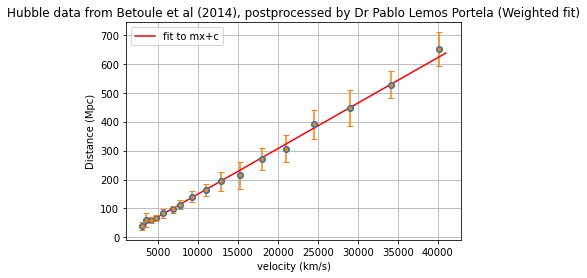

In [96]:
############################################################################################################################
#                                          Weighted Least-squares fit                                                      #
############################################################################################################################

import numpy as np
import matplotlib.pyplot as plt

########################################################################
#Load the csv-file onto notebook, unpack it and assign it to x1 and y1.#
########################################################################
vel, dist, dist_err = np.loadtxt('hubble_data.csv', delimiter=',', unpack=True) 

#######################################################################################################
#Calculate all the values needed for the weighted fit via the equations in the Supplementary Notebook.#
#######################################################################################################
weight = 1/((dist_err)**2)

m_wi = ((np.sum(weight)*np.sum(weight*vel*dist))-(np.sum(weight*vel)*np.sum(weight*dist)))/((np.sum(weight)*np.sum(weight*vel*vel))-((np.sum(weight*vel))**2))

c_wi = ((np.sum(weight*vel*vel)*np.sum(weight*dist))-(np.sum(weight*vel)*np.sum(weight*dist*vel)))/((np.sum(weight)*np.sum(weight*vel*vel))-((np.sum(weight*vel))**2))

delta = ((np.sum(weight)*np.sum(weight*vel*vel))-((np.sum(weight*vel))**2)) #This is the same calculation as the denominator
                                                                            ###############of the previous two lines of code.
###############################################
#calculate the uncertainties in the parameters#
###############################################
delta_m_wi = np.sqrt(np.sum(weight)/delta)

delta_c_wi = np.sqrt(np.sum(weight*vel*vel)/delta) 

################################
#Plot line of weighted best fit#
################################
x_wi= np.linspace(2990,41000,100)#generate a 100 x-values between 2990(approx. x1 min) and 41000(approx. x1 max) for line of best fit
y_wi= m_wi*x_wi + c_wi
plt.plot(x_wi,y_wi,'-r', label='fit to mx+c')
plt.legend(loc='upper left')
plt.grid()

####################################
#Plot the points for the data-set .#
####################################
plt.plot(vel,dist, 'o', label='Hubble data') #Set label name so it can be used for legend
plt.title("Hubble data from Betoule et al (2014), postprocessed by Dr Pablo Lemos Portela (Weighted fit)")#I chose this title as it adequately describes what the graph is.
plt.xlabel(r"velocity (km/s)") #Name the x-axis to show what type of data it represents and its units
plt.ylabel(r"Distance (Mpc)") #Name the y-axis 

#########################################################
#plot the errorbars on the data points from the csv file#
#########################################################
plt.errorbar(vel, dist, yerr = dist_err, fmt='.', capsize=3)

#################################
#Print the parameters of the fit#
#################################
print(f"slope = {m_wi}+/-{delta_m_wi}, y-intercept = {c_wi}+/-{delta_c_wi}")


slope(m) = 0.01597939731196561 ± 0.0002206588105827228
y-intercept(c) = -11.624040905828377 ± 4.078725830535066


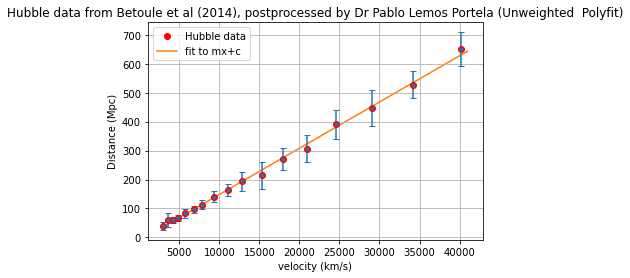

In [97]:
# Fit to a line ax+b (a line is a first-order polynomial).
# We will obtain the uncertainties of slope and intercept from the covariance matrix.
# Degree of polynomial we want to fit, use 1 for a line:
degree = 1
fit, cvm = np.polyfit(vel,dist,degree,cov=True) # fit function
# Outputs of np.polyfit are fit parameters (fit) and covariance matrix (cvm)
# The slope is the first element of fit: a = fit[0].
# The intercept is the second element of fit: b = fit[1].
# To obtain the uncertainties of fit parameters we get the diagonal elements
# of the covariance matrix:
dfit = [np.sqrt(cvm[i,i]) for i in range(2)] 
# The error of the slope is dfit[0].
# The error of the intercept is dfit[1].
# Print fit parameters with their errors (to 2 decimal places):
print(u"slope(m) = {0} \xb1 {1}".format(fit[0], dfit[0]))
print(u"y-intercept(c) = {0} \xb1 {1}".format(fit[1], dfit[1]))

plt.errorbar(vel, dist, yerr = dist_err, fmt='.', capsize=3)

# Plot the data points together with the fit:
x_polyfit= np.linspace(2990,41000,100) #create array to plot fitted line
y_polyfit = fit[0]*x_polyfit + fit[1] #calculate fitted line for every xfit point
plt.plot(vel, dist, 'ro', label="Hubble data")
plt.plot(x_polyfit, y_polyfit, zorder=-1, label="fit to mx+c")
plt.legend(loc="best")
plt.grid()
plt.title("Hubble data from Betoule et al (2014), postprocessed by Dr Pablo Lemos Portela (Unweighted  Polyfit)")#I chose this title as it adequately describes what the graph is.
plt.xlabel(r"velocity (km/s)") #Name the x-axis to show what type of data it represents and its units
plt.ylabel(r"Distance (Mpc)") #Name the y-axis 
plt.show()

m_polyfit = fit[0]
c_polyfit = fit[1]
delta_m_polyfit = dfit[0]
delta_c_polyfit = dfit[1]

slope(m)= 0.01574034318901381 ± 0.000827025757910185
y-intercept(c)= -8.32585537874202 ± 7.37387236367192


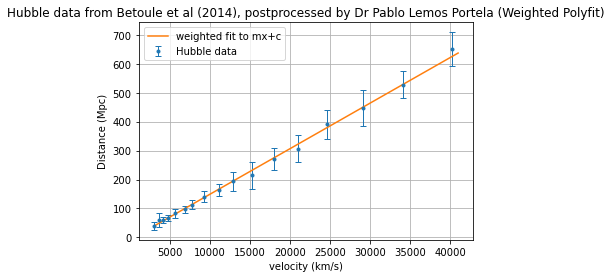

In [98]:
# First calculate the weights for the y coordinate. 
# Enter errors as an array of 1/sigma for Gaussian uncertainties (not 1/sigma**2):
yErrors = 1/dist_err
# Perform weighted fit: fit = parameters, cvm = covariance matrix
fit, cvm = np.polyfit(vel,dist,degree,w=yErrors,cov='unscaled')
# Outputs and errors of fitted parameters are same as before.
dfit = [np.sqrt(cvm[i,i]) for i in range(2)]
# Print fit parameters with their errors (to 2 decimal places):
print(u"slope(m)= {0} \xb1 {1}".format(fit[0], dfit[0]))
print(u"y-intercept(c)= {0} \xb1 {1}".format(fit[1], dfit[1]))

# Plot the data points together with the fit:
x_polyfit_wi = np.linspace(2990,41000,100) #create array to plot fitted line
y_polyfit_wi = fit[0]*x_polyfit_wi + fit[1] #calculate fitted line for every x_polyfit_wi

# Plot points with error bars:
plt.errorbar(vel, dist, yerr = dist_err, fmt=".", linewidth=1, capsize=3, label="Hubble data")

plt.plot(x_polyfit_wi, y_polyfit_wi,'-', label="weighted fit to mx+c")
plt.legend(loc="best")
plt.grid()
plt.title("Hubble data from Betoule et al (2014), postprocessed by Dr Pablo Lemos Portela (Weighted Polyfit)")#I chose this title as it adequately describes what the graph is.
plt.xlabel(r"velocity (km/s)") #Name the x-axis to show what type of data it represents and its units
plt.ylabel(r"Distance (Mpc)") #Name the y-axis 
 
plt.show()

m_polyfit_wi = fit[0]
c_polyfit_wi = fit[1]
delta_m_polyfit_wi = dfit[0]
delta_c_polyfit_wi = dfit[1]

In [80]:

from scipy.optimize import curve_fit # we're importing just this one function from scipy.optimize


def straight_line(vel,m,c):
    """Calculates a straight line y = mx+c
    Inputs: x value (or set of x values)
            gradient of straight line m
            y-intercept of straight line c
    Returns: the corresponding y value(s)"""
    dist = m*vel + c # equation for straight line
    return dist

# Unweighted fit:
# poptUW: Optimized parameters for the unweighted fit
# pcovUW: matrix of covariance for the unweighted fit
#   xi, yi: rename these to whatever variable names you have used
#   for your x and y data respectively.  
poptUW,pcovUW = curve_fit(straight_line,vel,dist)
print ("poptUW :\n", poptUW)
print ("pcovUW :\n", pcovUW)

# Weighted fit
# poptW: Optimized parameters for the weighted fit
# pcovW: matrix of covariance for the weighted fit
#   xi, yi: rename these to whatever variable names you have used
#   for your x and y data respectively.  
poptW,pcovW = curve_fit(straight_line,vel,dist, sigma=dist_err, absolute_sigma=True)
print ("poptW :\n", poptW)
print ("pcovW :\n", pcovW)

poptUW :
 [  0.0159794  -11.62404147]
pcovUW :
 [[ 4.86903131e-08 -7.20404316e-04]
 [-7.20404316e-04  1.66360045e+01]]
poptW :
 [ 0.01574034 -8.32585552]
pcovW :
 [[ 6.83971554e-07 -4.78658714e-03]
 [-4.78658714e-03  5.43739930e+01]]


In [94]:
print ("Covariance of two variables tells us the direction in which their linear relationship is. It is unstandardized, unlike correlation. It is usually represented as cov(x,y).")
print ()
print ()
print ("(Saha, S., 2018. Let Us Understand The Correlation Matrix And Covariance Matrix. [online] Medium. Available at: <https://towardsdatascience.com/let-us-understand-the-correlation-matrix-and-covariance-matrix-d42e6b643c22> [Accessed 5 October 2018].)")

Covariance of two variables tells us the direction in which their linear relationship is. It is unstandardized, unlike correlation. It is usually represented as cov(x,y).


(Saha, S., 2018. Let Us Understand The Correlation Matrix And Covariance Matrix. [online] Medium. Available at: <https://towardsdatascience.com/let-us-understand-the-correlation-matrix-and-covariance-matrix-d42e6b643c22> [Accessed 5 October 2018].)


In [132]:
print ("For an unweighted fit:")
print (f"slope = {m} +/- {delta_m}" )
print (f"y-intercept = {c} +/- {delta_c}" )
print()
print ("For an Weighted fit:")
print (f"slope = {m_wi} +/- {delta_m_wi}" )
print (f"y-intercept = {c_wi} +/- {delta_c_wi}")
print()
print ("For an Unweighted Polyfit:")
print (f"slope = {m_polyfit} +/- {delta_m_polyfit}" )
print (f"y-intercept = {c_polyfit} +/- {delta_c_polyfit}")
print()
print ("For a Weighted Polyfit:")
print (f"slope = {m_polyfit_wi} +/- {delta_m_polyfit_wi}" )
print (f"y-intercept = {c_polyfit_wi} +/- {delta_c_polyfit_wi}")
print()
print ("For an Unweighted Curvefit :\n", poptUW)
print ("Covariance matrix of Unweighted Curvefit parameters :\n", pcovUW)
print()
print ("For a Weighted Curvefit :\n", poptW)
print ("Covariance matrix of Weighted Curvefit parameters :\n", pcovW)




For an unweighted fit:
slope = 0.015979397311965602 +/- 0.00022065881058272273
y-intercept = -11.624040905828423 +/- 8.928403373005519e-05

For an Weighted fit:
slope = 0.015740343189013812 +/- 0.0008270257579101851
y-intercept = -8.325855378742016 +/- 7.373872363671919

For an Unweighted Polyfit:
slope = 0.01597939731196561 +/- 0.0002206588105827228
y-intercept = -11.624040905828377 +/- 4.078725830535066

For a Weighted Polyfit:
slope = 0.01574034318901381 +/- 0.000827025757910185
y-intercept = -8.32585537874202 +/- 7.37387236367192

For an Unweighted Curvefit :
 [  0.0159794  -11.62404147]
Covariance matrix of Unweighted Curvefit parameters :
 [[ 4.86903131e-08 -7.20404316e-04]
 [-7.20404316e-04  1.66360045e+01]]

For a Weighted Curvefit :
 [ 0.01574034 -8.32585552]
Covariance matrix of Weighted Curvefit parameters :
 [[ 6.83971554e-07 -4.78658714e-03]
 [-4.78658714e-03  5.43739930e+01]]


In [134]:
print ("I will be choosing the first method, which is where the fit is calculated via the eqautions in the supplementary notebook.")
print ("This is because it outputs patrameters for the fit with the highest precision.")


I will be choosing the first method, which is where the fit is calculated via the eqautions in the supplementary notebook.
This is because it outputs patrameters for the fit with the highest precision.


For Unweighted fit
 slope = 0.015979397311965602+/-0.00022065881058272273, y-intercept = -11.624040905828423+/-8.928403373005519e-05

For Weighted fit
 slope = 0.015740343189013812+/-0.0008270257579101851, y-intercept = -8.325855378742016+/-7.373872363671919


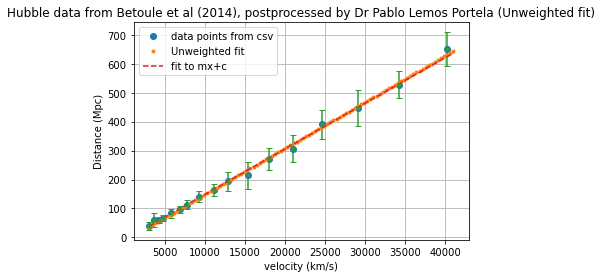

In [156]:
import numpy as np
import matplotlib.pyplot as plt

#Load the csv-file onto notebook, unpack it and assign it to x1 and y1.
vel, dist, dist_err = np.loadtxt('hubble_data.csv', delimiter=',', unpack=True) 

#Plot the points for the data-set .
plt.figure()
plt.plot(vel,dist, 'o', label='data points from csv') #Set label name so it can be used for legend
plt.title("Hubble data from Betoule et al (2014), postprocessed by Dr Pablo Lemos Portela (Unweighted fit)")#I chose this title as it adequately describes what the graph is.
plt.xlabel(r"velocity (km/s)") #Name the x-axis to show what type of data it represents and its units
plt.ylabel(r"Distance (Mpc)") #Name the y-axis 

#Make the necessary calculations to calculate the slope and y-intercept of line of best fit(method of least sqaures fitting
xmean = np.mean(vel)
ymean = np.mean(dist)
m = (np.sum(vel*dist-xmean*dist))/(np.sum((vel-xmean)**2))  
c = ymean - m*xmean

#Make calculations for uncertainty values of gradient and y-intercept
S = np.sum((dist-m*vel-c)**2)
D = np.sum((vel-xmean)**2)
n = len(vel)

delta_m = np.sqrt(S/((n-2)*D))
delta_c = np.sqrt(((1/n)+(((xmean)**2)/D))*(S/((n-2)*D)))


#Plot line of best fit
x2= np.linspace(2990,41000,100)#generate a 100 x-values between 2990(x1 min) and 41000(x1 max) for line of best fit
y2= m*x2 + c
plt.plot(x2,y2,'.', label='Unweighted fit')
plt.legend(loc='upper left')
plt.grid()

plt.errorbar(vel, dist, yerr = dist_err, fmt='.', capsize=3)

print ("For Unweighted fit")
print(f" slope = {m}+/-{delta_m}, y-intercept = {c}+/-{delta_c}")
print ()
    
    

########################################################################
#Load the csv-file onto notebook, unpack it and assign it to x1 and y1.#
########################################################################
vel, dist, dist_err = np.loadtxt('hubble_data.csv', delimiter=',', unpack=True) 

#######################################################################################################
#Calculate all the values needed for the weighted fit via the equations in the Supplementary Notebook.#
#######################################################################################################
weight = 1/((dist_err)**2)

m_wi = ((np.sum(weight)*np.sum(weight*vel*dist))-(np.sum(weight*vel)*np.sum(weight*dist)))/((np.sum(weight)*np.sum(weight*vel*vel))-((np.sum(weight*vel))**2))

c_wi = ((np.sum(weight*vel*vel)*np.sum(weight*dist))-(np.sum(weight*vel)*np.sum(weight*dist*vel)))/((np.sum(weight)*np.sum(weight*vel*vel))-((np.sum(weight*vel))**2))

delta = ((np.sum(weight)*np.sum(weight*vel*vel))-((np.sum(weight*vel))**2)) #This is the same calculation as the denominator
                                                                            ###############of the previous two lines of code.
###############################################
#calculate the uncertainties in the parameters#
###############################################
delta_m_wi = np.sqrt(np.sum(weight)/delta)

delta_c_wi = np.sqrt(np.sum(weight*vel*vel)/delta) 

################################
#Plot line of weighted best fit#
################################
x_wi= np.linspace(2990,41000,100)#generate a 100 x-values between 2990(approx. x1 min) and 41000(approx. x1 max) for line of best fit
y_wi= m_wi*x_wi + c_wi
plt.plot(x_wi,y_wi,'--', label='fit to mx+c')
plt.legend(loc='upper left')
#plt.grid()



#################################
#Print the parameters of the fit#
#################################
print("For Weighted fit")
print(f" slope = {m_wi}+/-{delta_m_wi}, y-intercept = {c_wi}+/-{delta_c_wi}")



plt.savefig('C:\\Users\safee\OneDrive\Desktop\ReadingTask.png')

{4.902744876744691e-13} {4.902744876744691e-13}


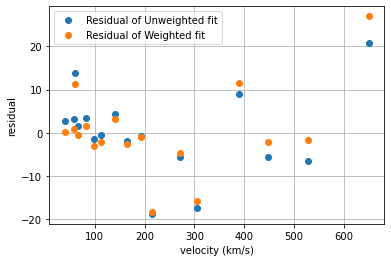

In [167]:
residual_UW = dist - (m*vel) - c

residual_W  = dist - (m_wi*vel) - c_wi

plt.plot (dist,residual_UW,"o",label='Residual of Unweighted fit')

plt.plot (dist,residual_W,"o",label='Residual of Weighted fit')

plt.xlabel(r"velocity (km/s)")
plt.ylabel(r"residual")


plt.legend()

i = np.sum (residual_UW)

j = np.sum (residual_UW)

print ({i}, {j})
plt.grid ()

In [172]:
print ("I have noticed that when x<200, residual_W<residual_UW, but when x>200, the opposite is true."  )
print ("But in general, residual_UW has a slightly lower value while both still remaining fairly random.")
print ("So I think a straight line is a good way to get a good fit of the data.")

I have noticed that when x<200, residual_W<residual_UW, but when x>200, the opposite is true.
But in general, residual_UW has a slightly lower value while both still remaining fairly random.
So I think a straight line is a good way to get a good fit of the data.


In [194]:
Hubble_Constant_UW = 1/m
Hubble_Constant_W  = 1/m_wi

Delta_Hubble_Constant_UW = 1/delta_m
Delta_Hubble_Constant_W = 1/delta_m_wi


print (f"The Hubble's Cosntant according to the Unweighted fit is: {Hubble_Constant_UW} +/- {Delta_Hubble_Constant_UW} km/s Mpc" )
print ()
print (f"The Hubble's Cosntant according to the Weighted fit is: {Hubble_Constant_W} +/- {Delta_Hubble_Constant_W} km/s Mpc" )
print ()
print ("The weighted fit gives a better value as the relative uncertainty is lower in this case and the value is closer to the accepted value.")
print ()
print ()
print ("These results will let us use Hubble's Law to calculate the velocity of an astronomical object if we know its distance.")
print ("The opposite is also true.")
print ("The Hubble's constant can then be used to get an estimate for the age of the Universe as knowing the distance of the farthest object can tell us this information.")

The Hubble's Cosntant according to the Unweighted fit is: 62.5805830143034 +/- 4531.883396630157 km/s Mpc

The Hubble's Cosntant according to the Weighted fit is: 63.531016318498295 +/- 1209.1521823055477 km/s Mpc

The weighted fit gives a better value as the relative uncertainty is lower in this case and the value is closer to the accepted value.


These results will let us use Hubble's Law to calculate the velocity of an astronomical object if we know its distance.
The opposite is also true.
The Hubble's constant can then be used to get an estimate for the age of the Universe as knowing the distance of the farthest object can tell us this information.
